In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in a csv to play with

In [4]:
df = pd.read_csv('data/all_sig_and_bkg_in_110_to_160_GeV.csv')
df = df[df.bin >= 0] # only look at those in signal region

Make some cuts

In [5]:
bkgdf = df[df.is_signal <= 0]
sigdf = df[df.is_signal > 0]
bkgdf.describe()

,Unnamed: 0,MET,N_valid_bjets,N_valid_electrons,N_valid_extra_leptons,N_valid_extra_muons,N_valid_jets,bin,bjet0_eta,bjet0_pt,...,m_jj,mu0_eta,mu0_pt,mu1_eta,mu1_pt,mu_res_eta,phi_star,weight,zep0,zep1
count,168717.000000,168717.000000,168717.000000,168717.000000,168717.000000,168717.000000,168717.000000,168717.000000,168717.000000,168717.000000,...,168717.000000,168717.000000,168717.000000,168717.000000,168717.000000,168717.000000,1.687170e+05,168717.000000,168717.000000,168717.000000
mean,54697.197733,119.074519,0.521014,0.028213,0.275716,0.247503,2.229698,9.056183,-590.661238,-553.378288,...,-192.112511,0.003874,85.274055,-0.000940,42.179314,1.016523,1.453487e+01,0.675035,-375.792270,-375.792146
std,53122.242276,88.076434,0.695923,0.181530,0.525485,0.504225,1.683437,5.757201,491.116726,537.230429,...,669.204715,1.189760,41.929581,1.226258,17.142263,0.443525,5.470313e+03,3.196760,483.940813,483.940909
min,0.000000,0.078131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,...,-999.000000,-2.399890,26.004500,-2.399940,10.000200,0.003638,3.946690e-06,-13.150000,-999.000000,-999.000000
25%,15642.000000,60.490700,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,-999.000000,-999.000000,...,-999.000000,-0.917633,61.194000,-0.970688,30.442500,0.692678,1.516910e-01,0.000520,-999.000000,-999.000000
50%,35136.000000,102.028000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,-999.000000,-999.000000,...,106.736000,0.001910,75.357500,-0.002007,41.504700,1.007360,3.589930e-01,0.007278,-0.905979,-0.903584
75%,75297.000000,155.737000,1.000000,0.000000,0.000000,0.000000,3.000000,14.000000,-0.332840,65.275000,...,247.506000,0.925897,98.065700,0.967934,52.311300,1.311840,7.003250e-01,0.388288,0.257427,0.258539
max,216313.000000,7732.100000,4.000000,3.000000,3.000000,3.000000,14.000000,19.000000,2.399290,1106.150000,...,5704.850000,2.399880,876.973000,2.399930,512.839000,2.394720,2.246930e+06,13.161300,4.651930,4.264580


Make some plots

In [18]:
%matplotlib inline
sns.distplot(sigdf.MET, kde=False, norm_hist=True, bins=100, color='green', hist_kws={'weights': sigdf.weight, 'alpha': 0.7, 'range': (0,200)})
sns.distplot(bkgdf.MET, kde=False, norm_hist=True, bins=100, color='blue', hist_kws={'weights': bkgdf.weight, 'alpha': 0.7, 'range': (0,200)})

TypeError: distplot() got an unexpected keyword argument 'range'

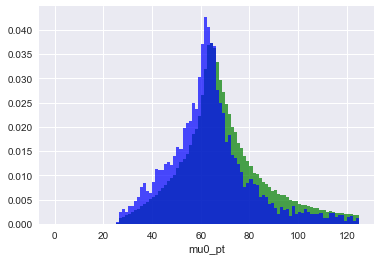

In [20]:
sns.distplot(sigdf.mu0_pt, kde=False, norm_hist=True, bins=100, color='green', hist_kws={'range': (0,125), 'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.mu0_pt, kde=False, norm_hist=True, bins=100, color='blue', hist_kws={'range': (0,125), 'weights': bkgdf.weight, 'alpha': 0.7})

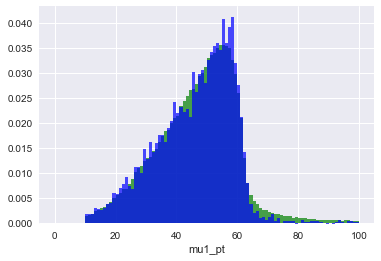

In [21]:
sns.distplot(sigdf.mu1_pt, kde=False, norm_hist=True, bins=100, color='green', hist_kws={'range': (0,100), 'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.mu1_pt, kde=False, norm_hist=True, bins=100, color='blue', hist_kws={'range': (0,100), 'weights': bkgdf.weight, 'alpha': 0.7})

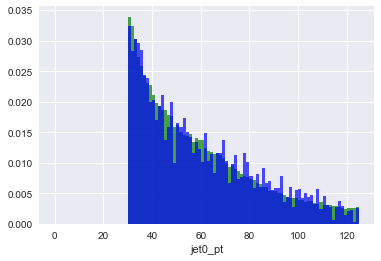

In [23]:
sigdfj = sigdf[sigdf.N_valid_jets > 0]
bkgdfj = bkgdf[bkgdf.N_valid_jets > 0]
sns.distplot(sigdfj.jet0_pt, kde=False, norm_hist=True, bins=100, color='green', hist_kws={'range': (0,125),'weights': sigdfj.weight, 'alpha': 0.7})
sns.distplot(bkgdfj.jet0_pt, kde=False, norm_hist=True, bins=100, color='blue', hist_kws={'range': (0,125),'weights': bkgdfj.weight, 'alpha': 0.7})

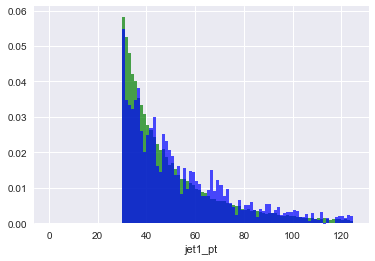

In [25]:
sigdfj = sigdf[sigdf.N_valid_jets > 1]
bkgdfj = bkgdf[bkgdf.N_valid_jets > 1]
sns.distplot(sigdfj.jet1_pt, kde=False, norm_hist=True, bins=100, color='green', hist_kws={'range': (0,125), 'weights': sigdfj.weight, 'alpha': 0.7})
sns.distplot(bkgdfj.jet1_pt, kde=False, norm_hist=True, bins=100, color='blue', hist_kws={'range': (0,125), 'weights': bkgdfj.weight, 'alpha': 0.7})

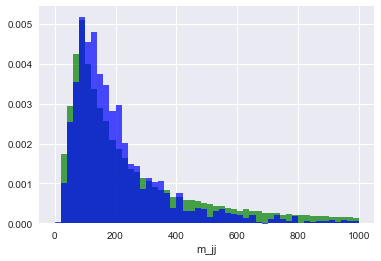

In [32]:
sigdfj = sigdf[sigdf.N_valid_jets > 1]
bkgdfj = bkgdf[bkgdf.N_valid_jets > 1]
sns.distplot(sigdfj.m_jj, kde=False, norm_hist=True, bins=50, color='green', hist_kws={'range': (0,1000),'weights': sigdfj.weight, 'alpha': 0.7})
sns.distplot(bkgdfj.m_jj, kde=False, norm_hist=True, bins=50, color='blue', hist_kws={'range': (0,1000),'weights': bkgdfj.weight, 'alpha': 0.7})

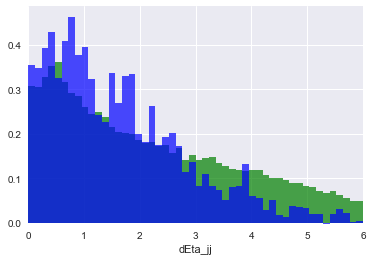

In [31]:
plt.xlim(0,6)
sns.distplot(sigdfj.dEta_jj, kde=False, norm_hist=True, bins=50, color='green', hist_kws={'range': (0,6),'weights': sigdfj.weight, 'alpha': 0.7})
sns.distplot(bkgdfj.dEta_jj, kde=False, norm_hist=True, bins=50, color='blue', hist_kws={'range': (0,6),'weights': bkgdfj.weight, 'alpha': 0.7})

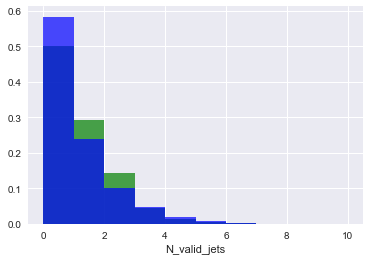

In [33]:
sns.distplot(sigdf.N_valid_jets, kde=False, norm_hist=True, bins=10, color='green', hist_kws={'range': (0,10),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.N_valid_jets, kde=False, norm_hist=True, bins=10, color='blue', hist_kws={'range': (0,10),'weights': bkgdf.weight, 'alpha': 0.7})

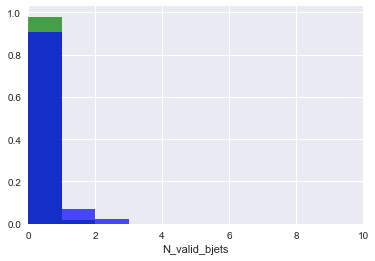

In [34]:
plt.xlim(0,10)
sns.distplot(sigdf.N_valid_bjets, kde=False, norm_hist=True, bins=10, color='green', hist_kws={'range': (0,10),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.N_valid_bjets, kde=False, norm_hist=True, bins=10, color='blue', hist_kws={'range': (0,10),'weights': bkgdf.weight, 'alpha': 0.7})

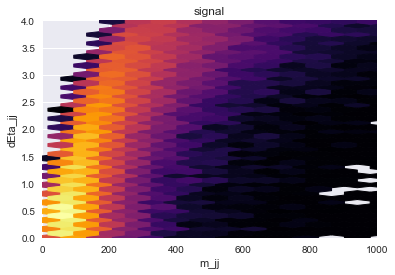

In [15]:
plt.xlim(0,1000)
plt.ylim(0,4)
plt.xlabel('m_jj')
plt.ylabel('dEta_jj')
plt.title('signal')
plt.hexbin(sigdfj.m_jj, sigdfj.dEta_jj, gridsize=100, bins='log', C=sigdfj.weight.apply(lambda x: x*1e2), reduce_C_function=np.sum, cmap='inferno')

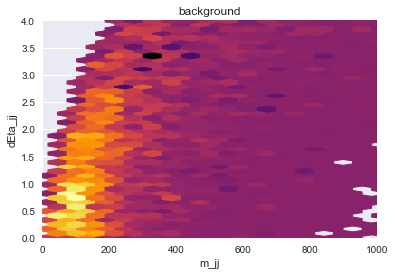

In [16]:
plt.xlim(0,1000)
plt.ylim(0,4)
plt.title('background')
plt.xlabel('m_jj')
plt.ylabel('dEta_jj')
ax = plt.hexbin(bkgdfj.m_jj, bkgdfj.dEta_jj, gridsize=100, bins='log', C=bkgdfj.weight.apply(lambda x: x*1e-2), reduce_C_function=np.sum, cmap='inferno')